In [1]:
# import所有需要的packages
import numpy as np
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.manifold import Isomap
from skimage.color import rgb2gray
import gzip
import os

In [13]:
def get_data(path, photo_a, photo_b, jump):
    
    image_range = np.arange(photo_a, photo_b, jump+1)
    
    image_dir = os.listdir(path)
    
    image_data = []
    
    for i in image_range:
        file_dir = image_dir[i]
        gray_img = rgb2gray(plt.imread(path + '/' + file_dir))
        image_data.append(gray_img)

    images = np.array(image_data)
    # 将数据reshape为，128*128图片
    image_data = images.reshape(photo_b - photo_a, 128*128)
    return image_data, images

# 数据集文件夹
path = './coil-100'
# from_cat从第几个类别开始
from_cat = 65
# to_cat到第几个类别结束
to_cat = 66
# 每个类别图片数量
nop_each_cat = 72
# 0为不跳过每一张图片，1为取一张跳一张
jump = 0

# 获得图像数据与图片
image_data, images = get_data(path, from_cat*nop_each_cat, to_cat*nop_each_cat, jump)
image_data.shape
images.shape

(72, 128, 128)

In [28]:
def plot_components(data, model, images=None, ax=None, thumb_frac=0.07, cmap='gray'):
    
    ax = plt.gca()
    
    # 对数据转为n维数据进行拟合
    project = model.fit_transform(data)
    ax.plot(project[:, 0], project[:, 1], '.k')
    
    if len(images) != 0:
        max_dist_projection = max(project.max(0) - project.min(0))
        # 设置最近距离，低于这个距离将不会显示
        min_dist = (thumb_frac * max_dist_projection) ** 2
        display_images = np.array([2 * project.max(0)])
        # 遍历所有图片，shape[0]为图片张数
        for i in range(data.shape[0]):
            dist = np.sum((project[i] - display_images) ** 2, 1)
            # 若点过近，将不会展示
            if np.min(dist) < min_dist:
                continue
            # 按垂直方向(行顺序)堆叠数组构成一个新的数组
            display_images = np.vstack([display_images, project[i]])
            # AnnotationBbox是一个标注框，其中可以放置任何Artist对象
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap),project[i])
            #将图片展示
            ax.add_artist(imagebox)

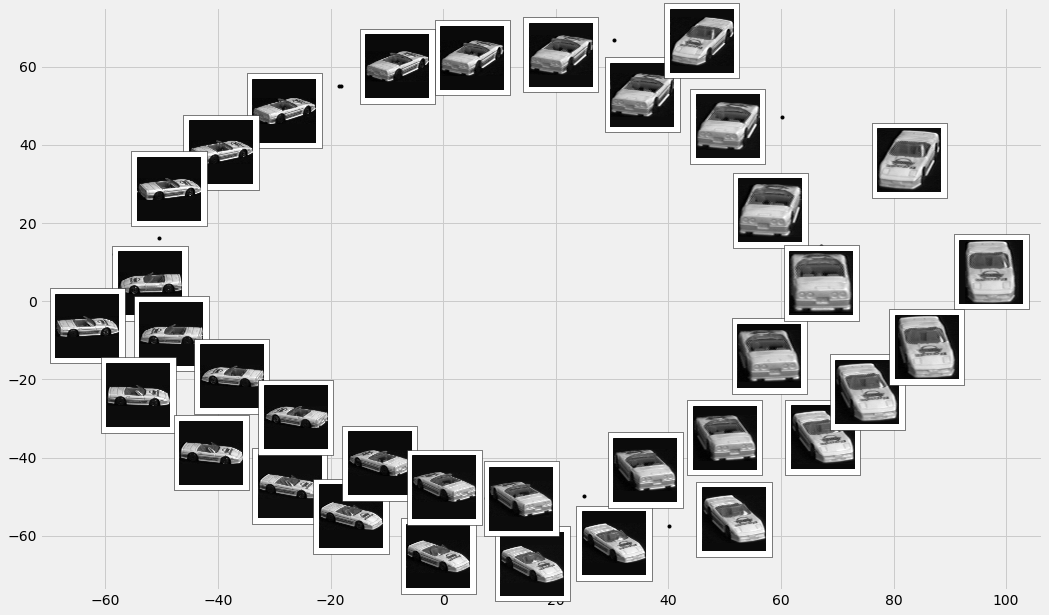

In [29]:
# 绘图风格
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(16, 10))
plot_components(image_data,
                model=Isomap(n_components=2),
                images=images[:, ::2, ::2],
                thumb_frac=0.08)